# Assignement 3: Convert a SQL database to NoSQL and Social Media

#### Anja Deric and Karan Soni

### ABSTRACT

For this assignment, we worked on collecting data from social media(Twitter) to complement our already existing data on flights, airports and airlines. Additionally, we also converted our previous database to NoSQL by connecting to a MongoDB server. Fr the first part of the assignment, we used the Twitter API to collect data on various topics related to our domain, including tweets about American Airlines (thing), Logan Airport (place), and pilots (people). We used Python to analyze this tweet data and determine what tags were most popular and trending within our domain. For the second half of the assignment, we imported our old data from Assignments 1 and 2, and along with our newly-collected twitter data, we converted everything into a NoSQL database. By connecting to a MongoDB server, we were also able to test and make sure some of database usecases worked and could provide information requested by the user.


### Aim: To convert the SQL database to NoSQL, and perform various operations on them to get the trends of users in social media.

### Collecting Social Media Data

To start the assignment, we first imported all libraries that we would be using throughout:

In [1]:
import csv
import json
import pandas as pd
import tweepy
import re
import numpy as np
import pandas as pd
import collections
import matplotlib
import matplotlib.pyplot as plt

We then made a twitter developer account and used our keys and tokens to establish a connection with the Twitter API.

In [2]:
# API keys and tokens
consumer_key = "mGtIt09UVXyzyW5LMBx6YKSIg"  
consumer_secret = "DCi2axya3I6iRdxLvnNzPbInscCA7oquTaZKJqSK2WOCDriwjp"  
access_token = "1238579197867524096-EhwxltGCsYmzWsDYoW9JsIqT3Yghck"  
access_token_secret = "2EBkSz2GRrC8w0tdpPxKEVGC4swpAQsDDoNkUMbKresIg"

# Establish connection with twitter API using developer keys
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)  
auth.set_access_token(access_token, access_token_secret)  
api = tweepy.API(auth, wait_on_rate_limit=True)

Next, we wrote a function to collect 100 tweets (combination of most popular and most recent tweets) by making an API request using the Cursor function from the tweepy library. The function works by searching for tweets that have a specific search term in them, which the user can decide on. Each tweet is then stored in a dictionary (we collected information such as the username, tweet test, number of retweets, hashtags, etc.). The function, in the end, returns all the tweets as a dataframe.

In [3]:
# Funtion to collect information on 100 tweets that contain a particular search term
def get_tweets(search_term):
    all_tweets = []
    # Make API request for tweets in English that contain search_term
    for tweet in tweepy.Cursor(api.search, q=search_term,lang = "en").items(100):
        # Store all tweets in dictionary
        all_tweets += [{ 'Tweet_id': tweet.id,
                'Screen_name':tweet.author.screen_name,
                'Created_at':tweet.created_at,
                'Tweet_text':tweet.text,
                'Hashtags':re.findall(r"#(\w+)",tweet.text),
                'Retweets':tweet.retweet_count,
                'Favorites':tweet.favorite_count,
                'Location':tweet.user.location}]
    # Return all tweets in dataframe format
    return pd.DataFrame(all_tweets)

Then, we used our function to collect 100 tweets relating to American Airlines, Logan Airport, and pilots, all terms related to our domain. To ensure our funciton worked, we additionally used the .head() method to check the first few tweets.

In [4]:
# Get 100 tweets on American Airlines (thing)
all_tweets = get_tweets("#AmericanAirlines")
airline_tweets = all_tweets
airline_tweets.head()

,Tweet_id,Screen_name,Created_at,Tweet_text,Hashtags,Retweets,Favorites,Location
0,1248042040522240001,PorcupineTimes,2020-04-09 00:16:24,#flying it would be great for biz to have #Tis...,"[flying, Tisa, COVIDー19]",0,0,United States
1,1248028366965530624,nickb767400,2020-04-08 23:22:04,RT @airlinevideos: 🇺🇸 @AmericanAir BOEING 737-...,"[planespotting, avgeek, aviation, airpl]",23,0,"Orange Park, FL"
2,1248013627023486977,InviteBunny,2020-04-08 22:23:30,#AmericanAirlines I sure hope you guys follow ...,"[AmericanAirlines, DeltaAirlines, unitedAIRLINES]",0,0,USA
3,1247997594749501440,pa_advocate98,2020-04-08 21:19:47,100 American Airlines flight attendants test p...,"[Covid_19PH, AmericanAirlines]",0,0,USA
4,1247997507596058628,RyanSalzwedel,2020-04-08 21:19:27,@AmericanAir I see @MarriottBonvoy is extendin...,[AmericanAirlines],0,0,"Chicago, USA!"


In [5]:
# Get 100 tweets on Logan Airport (place)
all_tweets = get_tweets("#LoganAirport")
airport_tweets = all_tweets
airport_tweets.head()

,Tweet_id,Screen_name,Created_at,Tweet_text,Hashtags,Retweets,Favorites,Location
0,1246797293338136576,RWayneLopez,2020-04-05 13:50:13,"Coming Soon 45 Province PH3B for lease at $12,...",[],0,1,"Boston, MA"
1,1246614553535922181,BOS_Boston_Limo,2020-04-05 01:44:05,"First class premium car services Boston, MA\nh...",[loganairport],0,1,"Boston, MA"
2,1246595470417371138,LisaAFerrari,2020-04-05 00:28:15,Looking for the place that moved so I can drop...,"[loganairport, bostonfishpier]",0,1,"Boston,MA"
3,1246164233240354816,jb_SID,2020-04-03 19:54:40,"26,000 people departed #LoganAirport last week...","[LoganAirport, Covid]",0,0,Boston
4,1246117138659545089,getmybuzzup,2020-04-03 16:47:32,The #newenglandpatriots plane just touched dow...,"[newenglandpatriots, loganairport, boston, n95...",0,0,"Yonkers, NY, CT, NJ, ATL, LA"


In [6]:
# Get 100 tweets on Pilot (person)
all_tweets = get_tweets("#pilot")
pilot_tweets = all_tweets
pilot_tweets.head()

,Tweet_id,Screen_name,Created_at,Tweet_text,Hashtags,Retweets,Favorites,Location
0,1248059185788366848,Boldmethod,2020-04-09 01:24:32,RT @BoseAviation: 7 Of The Strangest Instrumen...,"[whyifly, boseaviation, bosea20, boseprofl]",1,0,"Boulder, CO"
1,1248058781625434112,taggart_colin,2020-04-09 01:22:56,"RT @PilotHusky: Just love this photo, all the ...","[AvGeeks, av]",6,0,Toronto
2,1248058546660532233,Quaestor2250,2020-04-09 01:21:59,"RT @Quaestor2250: [Character: Arbitor] Antifa,...","[QuaestorMovie, ConceptArt, Blockchain, BitCoi...",13,0,
3,1248058197971292164,Angelic76095657,2020-04-09 01:20:36,RT @SteveHammActor: Just completed a patient t...,"[fly, Sunny]",5,0,"Philadelphia, PA"
4,1248058133404147712,EU_Precious,2020-04-09 01:20:21,RT @CONTEMPRA_INN: This 16-year-old #pilot-in-...,"[pilot, medical, rural, hospitals, GoodDeeds, ...",2,0,Finland


### Social Media Questions

After collecting all the data, we analyzed it in order to answer questions about tags, users, and trending topic within our domain. Below are the answers to all the questions from the assignment as well as detailed descriptions on how we went about finding those answers.

#### What are tags are associated with a person, place or thing?

To determine what tags were associated with each of our data frames, we first define a function to extract tags from our data frame. The get_hashtags function loops through every row of the dataframe and looks at the 'Hashtag' column. Since some tweets have multiple tags, the function splits them up and replaces or removes all the blank spots. Each tag is then added to the overall list of tags and sent back.

Now that this functions was created, we could simply call it with each domain- airport, airline, pilot.

In [7]:
# Function to extract all tags from the data frame
def get_hashtags(tweets):
    all_hashtags = []
    # Loop through each row in data frame
    for index, row in tweets.iterrows():
        # Extract all tags and split them up
        tweet_hashtags = row['Hashtags']
        for tag in tweet_hashtags:
            # Remove any extra space and add to the list of all tags
            tag = tag.replace("'", "")
            all_hashtags.append(tag.replace(" ", ""))
 
    # Remove all blank entries
    while("" in all_hashtags) : 
        all_hashtags.remove("")
        
    return all_hashtags

Here all the tags associated with American Airlines (a thing):

In [8]:
# Find and print most popular tags for American Airlines 
airline_tags = get_hashtags(airline_tweets)
print(airline_tags)

['flying', 'Tisa', 'COVIDー19', 'planespotting', 'avgeek', 'aviation', 'airpl', 'AmericanAirlines', 'DeltaAirlines', 'unitedAIRLINES', 'Covid_19PH', 'AmericanAirlines', 'AmericanAirlines', 'AmericanAirlines', 'AmericanAirlines', 'AmericanAirlines', 'AmericanAirlines', 'AmericanAirlines', 'AmericanAirlines', 'AmericanAirlines', 'AmericanAirlines', 'AmericanAirlines', 'planespotting', 'avgeek', 'aviation', 'airpl', 'AmericanAirlines', 'planespotting', 'avgeek', 'aviation', 'airpl', 'americanairlines', 'coronavirus', 'southwestairlines', 'AmericanAirlines', 'americanairlines', 'dfw', 'AmericanAirlines', 'WeAreInThisTogether', 'Aviation', 'Airlines', 'flightattendants', 'capitalism', 'AmericanAirlines', 'Airbus', 'Airbus350', 'Aviation', 'AviationDaily', 'AVGeek', 'TravelDiaries', 'AirbusLov', 'Airbus', 'Airbus350', 'Aviation', 'AviationDaily', 'AVGeek', 'TravelDiaries', 'LAX', 'London', 'LHR', 'travel', 'AmericanAirl', 'planespotting', 'avgeek', 'aviation', 'airpl', 'AmericanAirlines', 'Ca

Here all the tags associated with Logan Airport (a place):

In [9]:
# Find and print most popular tags for Logan Airport
airport_tags = get_hashtags(airport_tweets)
print(airport_tags)

['loganairport', 'loganairport', 'bostonfishpier', 'LoganAirport', 'Covid', 'newenglandpatriots', 'loganairport', 'boston', 'n95mask', 'repost', 'NewEngland', 'Patriots', 'LoganAirport', 'Boston', 'repost', 'NewEngland', 'Patriots', 'LoganAirport', 'Boston', 'repost', 'NewEngland', 'Patriots', 'LoganAirport', 'Boston', 'N95masks', 'Boston', 'LoganAirport', 'loganairport', 'loganairport', 'LoganAirport', 'LoganAirport', 'LoganAirport', 'LoganAirport', 'LoganAirport', 'LoganAirport', 'LoganAirport', 'LoganAirport', 'LoganAirport', 'LoganAirport', 'LoganAirport', 'LoganAirport', 'LoganAirport', 'LoganAirport', 'LoganAirport', 'LoganAirport', 'LoganAirport', 'LoganAirport', 'LoganAirport', 'LoganAirport']


Here all the tags associated with pilots (a person):

In [10]:
# Find and print most popular tags for pilot
pilot_tags = get_hashtags(pilot_tweets)
print(pilot_tags)

['whyifly', 'boseaviation', 'bosea20', 'boseprofl', 'AvGeeks', 'av', 'QuaestorMovie', 'ConceptArt', 'Blockchain', 'BitCoin', 'A', 'fly', 'Sunny', 'pilot', 'medical', 'rural', 'hospitals', 'GoodDeeds', 'Kind', 'aviation', 'airpl', 'aviation', 'airplane', 'planes', 'jets', 'aircraft', 'aviation', 'a', 'aviation', 'pilot', 'medical', 'rural', 'hospitals', 'GoodDeeds', 'Kind', 'pilot', 'medical', 'rural', 'hospitals', 'GoodDeeds', 'aviation', 'airplane', 'planes', 'jets', 'soarin', 'pilot', 'travel', 'dreaming', 'wa', 'soarin', 'pilot', 'travel', 'AvGeeks', 'av', 'NEWS', 'aerial', 'attack', 'Iran', 'aerial', 'attack', 'Iran', 'aviation', 'airplane', 'planes', 'jets', 'aircra', 'aviation', 'airplane', 'planes', 'jets', 'aircraft', 'pilot', 'heli', 'etsy', 'aviation', 'airplane', 'planes', 'jets', 'aviation', 'airplane', 'planes', 'jets', 'aircraft', 'pilot', 'journey', 'Germany', 'Seattle', 'Canada', 'Vancouver', 'England', 'aviation', 'airplane', 'planes', 'jets', 'aircraft', 'pilo', 'whyi

#### What social media users are like other social media users in your domain?

To determine which users in our domain are similar, we created a function called get_similar_users. The function takes in the data frame with all the tweet information and finds all users that tweeted using a particular tag. This is done by looping through all the tags, and any time the desired tag is found, the user that made that tweet is added to the list of similar users. This way, all users that tweet about a particular topic and use its specific tag are deemed to be similar.

In [11]:
# Function to find all users that used the same tag in their tweets
def get_similar_users(tweets, desired_tag):
    similar_users = []
    # Loop through each row in data frame
    for index, row in tweets.iterrows():
        # Extract all tags and split them up
        tweet_hashtags = row['Hashtags']
        for tag in tweet_hashtags:
            # Remove any extra space from tag
            tag = tag.replace("'", "")
            tag = tag.replace(" ", "")
            # If the tag matches the desired tag, add user to the list of similar users
            if tag == desired_tag:
                similar_users.append(row['Screen_name'])
        
    return similar_users

Here are some similar users which all tweeted about COVID19 and American Airlines:

In [12]:
# Find all distinct users that tweeted about B757
airline_users = get_similar_users(airline_tweets,'COVID19')
for user in set(airline_users):
    print(user)

CarvajalF
BackpackerAsia
theVickyR
airports_hotels
muhsin_AH


Here are some similar users which all tweeted about Boston and Boston's Logan Airport:

In [13]:
# Find all distinct users that tweeted about Quincy Cab
airport_users = get_similar_users(airport_tweets,'Boston')
for user in set(airport_users):
    print(user)

megaphone2017
MisterBigfoot
SusanKim4
JuliaFello


Here are some similar users which all tweeted with the pilot tag:

In [14]:
# Find all distinct users that tweeted aviation photos
pilot_users = get_similar_users(pilot_tweets,'pilot')
for user in set(pilot_users):
    print(user)

KLovesNature
mOQIl
aeromarinetax
CONTEMPRA_INN
ebcrew00
metat3000
MalvinHobbs
EU_Precious
princess_amp
boatmarinelife


#### What people, places or things are popular in your domain?

To get a list of most popular items in each domain, we created a function called popular_tags. This function uses the Counter method from the collections library to get a list of each tag used, accompanied by how many times it was used. It then uses the most_common method to extract the top 10 tags and print the tags (as well as the number of times they were used). This enabled us to see what topics were most popular for each set of tweets.

To get most popular people in the domain, we created a function called popular_user. This function gets all usernames and their associated popularity (calculated by adding up the number of retweets and favorites). Then, it finds the top 3 users and prints their name as well as popularity (sum of retweets and favorites for a single tweet).

Using these 2 functions, we were able to determine the most popular people, places, and things.

In [15]:
# Function to get most popular tags
def popular_tags(all_tags):
    # Count all tags and get top 10 most used tags
    tag_counts = collections.Counter(all_tags)
    popular_tags = tag_counts.most_common(10)
    # Print tags to the console
    for tag in popular_tags:
        print(tag[0] + ", " + str(tag[1]))
    return popular_tags
   
# Function to find top users (num specifies how many top users to find)
def popular_users(tweets, num):
    users = []
    popularity = []
    # Loop through each row in data frame
    for index, row in tweets.iterrows():
        # Calculate popularity as sum of retweets and favorites
        users.append(row['Screen_name'])
        popularity.append(row['Retweets'] + row['Favorites'])
    
    # Find maximum popularity values and the associated users 
    for index in range(len(popularity)):
        top_index = np.argsort(popularity)[-num:]
        top_users = [users[i] for i in top_index]
        top_popularity = [popularity[i] for i in top_index]
    
    # Print top users and their popularity
    for index in range(len(top_users)):
        print("User: "+top_users[index]+", Popularity: "+str(top_popularity[index]))

Here are the most popular people, places, and things in the American Airline domain:

In [16]:
# Find popular tags
print("Populart Places and Things")
pop_airline_tags = popular_tags(airline_tags)

# Find top 5 popular users
print()
print("Popular Users")
popular_users(airline_tweets,5)

Populart Places and Things
AmericanAirlines, 34
planespotting, 20
avgeek, 20
aviation, 20
airpl, 19
COVID19, 5
americanairlines, 3
coronavirus, 3
Aviation, 3
Airbus, 2

Popular Users
User: gib_zzz, Popularity: 23
User: LATVPHOTOG, Popularity: 23
User: Peter34080554, Popularity: 23
User: transportworker, Popularity: 34
User: airlinevideos, Popularity: 109


Here are the most popular people, places, and things in the Logan Airport domain:

In [17]:
# Find popular tags
print("Populart Places and Things")
pop_airport_tags = popular_tags(airport_tags)

# Find top 5 popular users
print()
print("Popular Users")
popular_users(airport_tweets,5)

Populart Places and Things
LoganAirport, 25
loganairport, 5
Boston, 4
repost, 3
NewEngland, 3
Patriots, 3
bostonfishpier, 1
Covid, 1
newenglandpatriots, 1
boston, 1

Popular Users
User: NHFirebuff20, Popularity: 20
User: Winthropvikings, Popularity: 20
User: chipsy231, Popularity: 20
User: Spanglor_13, Popularity: 20
User: JacqueGoddard, Popularity: 31


Here are the most popular people, places, and things in the pilot domain:

In [18]:
# Find popular tags
print("Populart Places and Things")
pop_pilot_tags = popular_tags(pilot_tags)

# Find top 5 popular users
print()
print("Popular Users")
popular_users(pilot_tweets,5)

Populart Places and Things
aviation, 27
airplane, 16
planes, 12
jets, 12
pilot, 10
fly, 6
Sunny, 6
aircraft, 6
Pilot, 4
AvGeeks, 3

Popular Users
User: fabiorovelo, Popularity: 19
User: osborne_ashiono, Popularity: 19
User: IATA, Popularity: 19
User: SteveHammActor, Popularity: 42
User: SweetTaleBooks, Popularity: 138


To better visualize our data, we also created a plot that shows the top 3 tags from each search that we did, as well as how many times that particular tags was tweeted across the 100 tweets that we collected from each category.

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

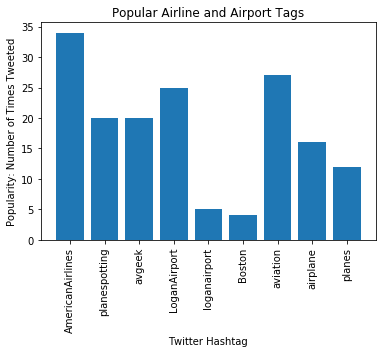

In [19]:
# Make a list of top 3 tags from each search
all_pop_tags = pop_airline_tags[0:3] + pop_airport_tags[0:3] + pop_pilot_tags[0:3]
pop_tag_df = pd.DataFrame(all_pop_tags)

# Plot popularity of each tag
plt.bar(pop_tag_df[0],pop_tag_df[1])
plt.title('Popular Airline and Airport Tags')
plt.ylabel('Popularity: Number of Times Tweeted')
plt.xlabel('Twitter Hashtag')
plt.xticks(rotation='vertical')

#### What people, places or things are trending in your domain?

To determine what things were trending in our domain, we collected twitter data over the span of 7 days (maximum number of days the twitter API allows). We created a function called get_tweets_until, which takes in a search term and a date, and collects 100 tweets that contain that search term for that particular date. 

In [20]:
# Function to collect tweet data for a particular date
def get_tweets_until(search_term,date):
    all_tweets = []
    # Get data from API for specific date listed
    for tweet in tweepy.Cursor(api.search, q=search_term,lang = "en",until=date).items(100):
        # Move data into a dictionary
        all_tweets += [{ 'Tweet_id': tweet.id,
                'Screen_name':tweet.author.screen_name,
                'Created_at':tweet.created_at,
                'Tweet_text':tweet.text,
                'Hashtags':re.findall(r"#(\w+)",tweet.text),
                'Retweets':tweet.retweet_count,
                'Favorites':tweet.favorite_count,
                'Location':tweet.user.location}]
    # Return all tweets as a dataframe
    return pd.DataFrame(all_tweets)

To get data from multiple dates, we created a for loop, which starts at a particular date and gets 100 tweets for that date, as well as 6 days after that. Next, the 10 most popular tags for each day are extracted using functions we created for previous parts, and those tags are then stored in a dictionary. In the end, the dictionary contains the most popular tags and their overall count for a span of 7 days.

In [21]:
# Create dictionary to store popular tags for 7 days
tag_trend = {1:[],2:[],3:[],4:[],5:[],6:[],7:[]}

# Loop through 7 different dates
for day in range(7):
    date = "2020-04-0" + str(day+2)
    # Collect twitter data and extract top 10 most popular tags
    tweets = get_tweets_until("#airtravel",date)
    all_tags = get_hashtags(tweets)
    tag_counts = collections.Counter(all_tags)
    popular_tags = tag_counts.most_common(10)
    # Store most popular tags for each day
    tag_trend.update({day+1: popular_tags})    

To check our data, we printed all the tags and their counts across all the days.

In [22]:
# Print all most popular tags across the 7 days
print(tag_trend)

{1: [('airtravel', 9), ('airlines', 3), ('travel', 3), ('scicomm', 2), ('COVID19', 2), ('AirQuality', 2), ('COVIDー19', 2), ('Catch2020', 2), ('AirTrafficControl', 2), ('coronacrisis', 2)], 2: [('airtravel', 36), ('aviation', 10), ('avgeek', 9), ('coronavirus', 9), ('airlines', 8), ('COVID19', 7), ('travel', 7), ('tui', 7), ('holidays', 7), ('AirTravel', 6)], 3: [('airtravel', 34), ('aviation', 18), ('avgeek', 12), ('travel', 9), ('Airtravel', 8), ('AeroSpace', 7), ('airbus', 7), ('COVID19', 7), ('Airport', 7), ('architecture', 7)], 4: [('airtravel', 28), ('aviation', 19), ('767300er', 17), ('YYZ', 17), ('toronto', 17), ('Airport', 10), ('travel', 10), ('airbus', 8), ('avgeek', 8), ('AeroSpace', 7)], 5: [('airtravel', 39), ('aviation', 27), ('airlines', 14), ('airports', 13), ('coronavirus', 11), ('airportinfrastructure', 10), ('Torabi', 7), ('AdMePlease', 7), ('whatinspiresme', 7), ('767300er', 7)], 6: [('airtravel', 36), ('aviation', 19), ('airports', 14), ('airlines', 12), ('airporti

Next, in order to decide which tags were trending over time, as opposed to just popular at the moment, we made a new list that extracted all tags from the tag dictionary and counted how many of those tags repeated on multiple days using the Counter method form the collecitons library. We decided that any tags that were considered most popular and tweeted on at least 3 of the 7 days would be considered trending tags. Printed pelow are the tags that fall into that category.

In [23]:
# Extract only tags for each day (without number of tweets)
just_tags = []
for day in tag_trend.items():
    day_tags = day[1];
    for tag in range(len(day_tags)):
        just_tags.append(day_tags[tag][0])
        
# Find all tags that were tweeted on at least 3 of the 7 days
num_days_tweeted = collections.Counter(just_tags) 
tweeted_most_days = [k for k, v in num_days_tweeted.items() if v > 2]
print(tweeted_most_days)

['airtravel', 'airlines', 'travel', 'COVID19', 'aviation', 'avgeek', 'coronavirus', 'AirTravel']


To better visualize the trending tags, we plotted wach trading tag with the number of days that tag was tweeted on.

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

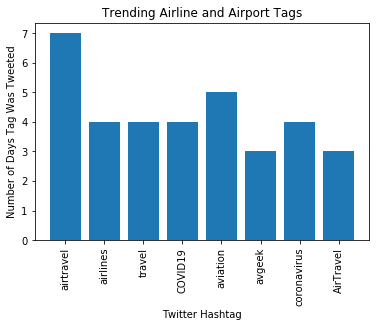

In [24]:
# Convert tag ditionary into a list and then a data frame to prepare for plotting
num_days_tweeted_list = []
for key, value in num_days_tweeted.items():
    if value > 2:
        temp = [key,value]
        num_days_tweeted_list.append(temp)  
num_days_tweeted_df = pd.DataFrame(num_days_tweeted_list)

# Plot trending tags and the number of days they were trending
plt.bar(num_days_tweeted_df[0],num_days_tweeted_df[1])
plt.title('Trending Airline and Airport Tags')
plt.ylabel('Number of Days Tag Was Tweeted')
plt.xlabel('Twitter Hashtag')
plt.xticks(rotation='vertical')

### Transitioning to NoSQL

#### Design Choices

In order to convert our database into NoSQL, we first started with the twitter/social media portion. We decided to make all of our tweets a part of one 'tweet' collections, with individual tweets being documents within that collections. Since we didn't normalize tweet data, we did not have to de-normalize it for this assignment. Each tweet document contained all the information about that particular tweet, including the user, the tweet text, hastags, number of retweets, etc. If this were a SQL database, each tweet most likely would've been split across a few tables. For example we would have a table for users and a table for tweets. A foreign key would connect each user with their individual tweets. However, in this NoSQL database, there are no forein keys, so each document contains all the neccessary information about the tweet, including the user. Included below are the steps we took in order to make this transition.

We first imported libraries neccessary to connect to a MongoDB server.

In [25]:
import pymongo

We then created an Assignment 3 database, and added a collection called tweets. 

In [26]:
# Connect to a server and create a new database with a collection for tweets
client = pymongo.MongoClient('localhost', 27017)
db = client['assignment3']
tweets=db['tweets']
tweets=db.tweets

Finally, in order to add all of our tweets in, we first combined them into a larger data frame, and we used the insert_many function in order to add individual tweets in as documents.

In [27]:
# Combine all tweet data frames and insert them into NoSQL database as individual documents
tweet_combo = [airline_tweets,airport_tweets,pilot_tweets]
all_tweets = pd.concat(tweet_combo)
tweets.insert_many(all_tweets.to_dict('records'))

Converting our original data into NoSQL was slightly more challenging since we split all the data up into multiple tables connected through foreign keys (it was a relational database). In order to move over to NoSQL, the data had to be denormalized, so we retracted back by using the original tables we made in Assignment 1, before normalizaiton. We decided to have 2 separate collections, one for flights and one for airports. Our flight collection would have documents about individual flights, which contained information about flight numbers, airport codes, departure and arrival times, and more. The airport collection would have information about top 30 airports in the world, inlcuding their locations, names, ranks, and more. Since you wouldn't have to draw from the airport collection in roder to learn information about individual flights, we decided those two collections were suitable, and wouldn't have to be combined. In other words, each document in each of the collections had all the information in it that was necessary for all the queries and the two collections didn't have to be related to each other as they would be in a normalized relational database.

To build this model, we started by importing the two tables in using the pandas read_csv function.

In [29]:
# Import flight data
flights_df = pd.read_csv(r'C:\Users\anja\Documents\INFO6210\flights_3.csv')
flights_df.head()

,flight_id,dep_airport_icao,arrival_airport_icao,airline_icao,departure_time,departure_timezone,arrival_time,arrival_timezone
0,VIR3948,KATL,EHAM,VIR,20:20:00,America/New_York,10:50:00,Europe/Amsterdam
1,KLM6012,KATL,EHAM,KLM,20:20:00,America/New_York,10:50:00,Europe/Amsterdam
2,AFR3655,KATL,EHAM,AFR,20:20:00,America/New_York,10:50:00,Europe/Amsterdam
3,VIR5071,KATL,KDFW,VIR,22:05:00,America/New_York,23:25:00,America/Chicago
4,KLM6336,KATL,KDFW,KLM,22:05:00,America/New_York,23:25:00,America/Chicago


In [30]:
# Import flight data
airports_df = pd.read_csv(r'C:\Users\anja\Documents\INFO6210\top_airports_3.csv')
airports_df.head()

,ICAO,IATA,name,city,country,longitude,latitude,altitude,Rank,half_year_count
0,CYYZ,YYZ,Lester B. Pearson International Airport,Toronto,Canada,43.677200,-79.630600,569,30,24463000.0
1,EDDF,FRA,Frankfurt am Main Airport,Frankfurt,Germany,50.033333,8.570556,364,15,33644000.0
2,EGLL,LHR,London Heathrow Airport,London,United Kingdom,51.470600,-0.461941,83,7,38750000.0
3,EHAM,AMS,Amsterdam Airport Schiphol,Amsterdam,Netherlands,52.308601,4.763890,-11,14,34537000.0
4,LEBL,BCN,Barcelona International Airport,Barcelona,Spain,41.297100,2.078460,12,29,24821000.0


Next, we added two collections to our database, and used the indert_many function to once again move the data over from a dataframe into our collections.

In [31]:
# Create and populate flight collection
flights_col=db['flights']
flights=db.flights_col
flights.insert_many(flights_df.to_dict('records'))

# Create and populate airport collection
airports_col=db['airports']
airports=db.airports_col
airports.insert_many(airports_df.to_dict('records'))

#### Demonstrating Retrieval of Data

To demonstrate the functionality of our new database, below are some use cases from our previous assignments that show how data can be extracted from each of the three collections using NoSQL queries.

##### Use-Case Example 1

In this use-case, find_one() function is used to look at a single document from each of the colletions. 

In [33]:
# Inspecting an airport document
airports.find_one()

{'_id': ObjectId('5e8e7a166c2a8d638e4c84c7'),
 'ICAO': 'CYYZ',
 'IATA': 'YYZ',
 'name': 'Lester B. Pearson International Airport',
 'city': 'Toronto',
 'country': 'Canada',
 'longitude': 43.67720032,
 'latitude': -79.63059998,
 'altitude': 569,
 'Rank': 30,
 'half_year_count': 24463000.0}

In [39]:
# Inspecting a flight document
flights.find_one()

{'_id': ObjectId('5e8e7a166c2a8d638e4c8498'),
 'flight_id': 'VIR3948',
 'dep_airport_icao': 'KATL',
 'arrival_airport_icao': 'EHAM',
 'airline_icao': 'VIR',
 'departure_time': '20:20:00',
 'departure_timezone': 'America/New_York',
 'arrival_time': '10:50:00',
 'arrival_timezone': 'Europe/Amsterdam'}

##### Use-Case Example 2

In this use-case, a NoSQL Query is used to find names of all airports that are in the top 30 airport list and located in the United States, all sorted by their rank in an ascending order.

In [79]:
# Query to find ailines flying from Atlanta to JFK that depart at 21:43
TopUSAirports=[]
for tt in airports.find({"country": "United States"}).sort("Rank",1):
    TopUSAirports.append(tt["name"])
    
# Print results of query
print(list(dict.fromkeys(TopUSAirports)))

['Hartsfield Jackson Atlanta International Airport', 'Los Angeles International Airport', "Chicago O'Hare International Airport", 'Dallas Fort Worth International Airport', 'Denver International Airport', 'John F Kennedy International Airport', 'San Francisco International Airport', 'Orlando International Airport', 'McCarran International Airport']


##### Use-Case Example 3

In this use-case, a NoSQL Query is used to find all airlines that are offering flights from the Atlanta Airport to New York's JFK. 

In [77]:
# Query to find ailines flying from Atlanta to JFK that depart at 21:43
ATLtoJFK=[]
for tt in flights.find({"dep_airport_icao": "KATL","arrival_airport_icao": "KJFK","departure_time":"21:43:00"}):
    ATLtoJFK.append(tt["airline_icao"])
    
# Print results of query
print(set(ATLtoJFK))

{'AZA', 'VIR', 'CSN', 'KAL', 'AMX'}


##### Use-Case Example 4

In this use-case, count() is used to create a query to count the number of tweets that have more than 10 favorites. 

In [90]:
# Query to find ailines flying from Atlanta to JFK that depart at 21:43
fav_tweets = tweets.find({"Favorites": {"$gt": 10 }}).count()
print(fav_tweets)

49


C:\Users\anja\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  


### REPORT

Through this assignment, we have written and used functions like get_tweets(), get_hashtags() and get_similar_users()to fetch data and attributes from the data via the "Tweepy" Twitter API package, after aggregating the popular and usefull data from the raw tweets, we have used the "PyMongo" package to load our python code onto the MongoDB framework. 


Questions:

What are tags are associated with a person, place or thing?
We determined the tags associated with each of our data frames using a function to extract tags from our raw data. The get_hashtags function loops through every row of the dataframe and looks at the 'Hashtag' column. Since some tweets have multiple tags, the function splits them up and replaces or removes all the blank spots. Each tag is then added to the overall list of tags and sent back.
The place, thing and person for our database are airport, airline and pilot respectively.


What social media users are like other social media users in your domain?
We have obtained the similar users using the get_similar_users function. This function takes in the data frame with all the tweet information and finds all users that tweeted using that particular tag. This is done by looping through all the tags, and any time the desired tag is found, the user that made that tweet is added to the list of similar users. This way, all users that tweet about a particular topic and use its specific tag are deemed to be similar.


What people, places or things are popular in your domain?
We have obtained the most popular items in each domain using the function called popular_tags. This function usede the Counter method from the collections library to get a list of each tag used, accompanied by how many times it was used. It then uses the most_common method to extract the top 10 tags and print the tags (as well as the number of times they were used). This enabled us to see what topics were most popular for each set of tweets.

Populart Places and Things
AmericanAirlines, 33
B757, 8
americanairlines, 4
refund, 4
insurance, 4
Paramedic, 4
Stock, 3
NewYork, 3
COVID19, 3
Boeing, 3

To get most popular people in the domain, we created a function called popular_user. This function gets all usernames and their associated popularity (calculated by adding up the number of retweets and favorites). Then, it finds the top 3 users and prints their name as well as popularity (sum of retweets and favorites for a single tweet).
Using these 2 functions, we were able to determine the most popular people, places, and things.


Popular Users
User: lantech19, Popularity: 10
User: AMERICA_PARTII, Popularity: 10
User: victorio_bdx, Popularity: 14
User: sammy_palmerrr, Popularity: 929
User: tothanines, Popularity: 929


What people, places or things are trending in your domain? (A trend is popularity over time.)
To get trending things in our domain, we collected data over 7 days and used a function we wrote to find which tags were both popular and tweeted across multiple days. Based on our data, we decided the trending topics are:
['airtravel', 'airlines', 'travel', 'COVID19', 'aviation', 'avgeek', 'coronavirus', 'AirTravel']


Additionally, summarized throughout the report is our procedure and design decisions we made as we converted into NoSQL, as well as som euse cases covered in previous assignments but converted into NoSQL.

### CONCLUSION

The primary focus of this assignment was learning how to analyze social media data, as well as convert a SQL/relational database into a NoSQL database (MongoDB, specifically). We expanded upon our database from Assignment 2 by adding twitter data to it, and analyzing it in order to answer questions about popular topic within our domain. We then converted our database into MongoDB by first denormalizing it, and then establishing a connection with a MongoDB server and transfering over our data.

### CONTRIBUTION
On our own: 60% (wrote all of our functions used throughout the report)

External Sources: 40% (resources for syntax and converting to MongoDB, listed in Citation section below)

### CITATIONS

https://developer.twitter.com/en/docs/tweets/search/api-reference/get-search-tweets (Twitter API Documentation- help with collecting Twitter data)

https://docs.mongodb.com/manual/reference/ (MondoDB in Python reference)

https://www.tutorialspoint.com/python/python_dictionary.htm (Python dictionaries)

https://www.w3schools.com/python/python_mongodb_getstarted.asp (Python MongoDB reference)

https://www.youtube.com/watch?v=FwMwO8pXfq0 (Installing MongoDB reference)

https://www.w3schools.com/python/python_mongodb_create_collection.asp (Creating MongoDB collections)

https://docs.mongodb.com/manual/core/databases-and-collections/ (Collection and document MongoDB reference)


### LICENSE
Copyright 2020 Anja Deric, Karan Soni

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated 
documentation files (the "Software"), to deal in the Software without restriction, including without limitation the 
rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit
persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the 
Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE 
WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR 
COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR 
OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.